In [1]:
!pip install openqaoa
!pip install --upgrade pip
!pip install azure-quantum[qiskit]

zsh:1: no matches found: azure-quantum[qiskit]


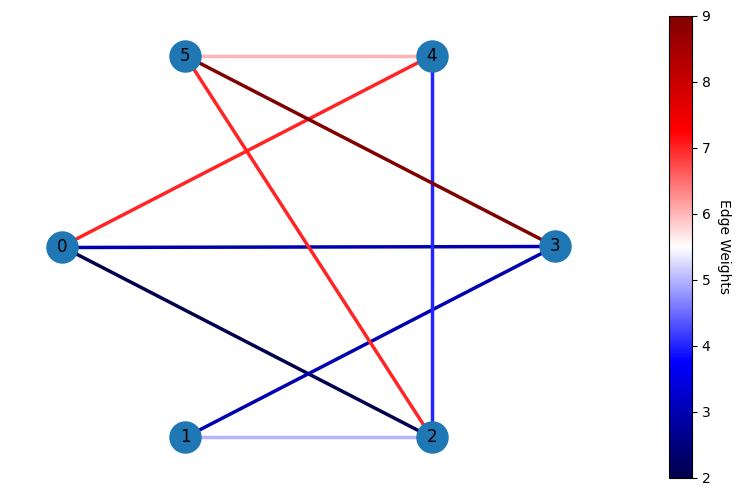

In [1]:
import networkx as nx
import qiskit.quantum_info as qsqi
import matplotlib.pyplot as plt
import random
from openqaoa.utilities import plot_graph

G = nx.generators.fast_gnp_random_graph(n=6, p=0.5, seed=42)

for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

for node in G.nodes():
    G.nodes[node]['weight'] = 0
plot_graph(G)



In [2]:
from openqaoa.problems import ShortestPath

sp_prob = ShortestPath(G, source=1, dest=0)
sp_qubo = sp_prob.qubo
sp_qubo.hamiltonian.expression

-1.0Z_{0}Z_{10} - 1.0Z_{0}Z_{4} - 1.0Z_{0}Z_{7} - 1.0Z_{0}Z_{9} - 1.0Z_{1}Z_{11} - 1.0Z_{1}Z_{5} - 1.0Z_{1}Z_{8} - 1.0Z_{2}Z_{12} - 1.0Z_{2}Z_{6} - 1.0Z_{2}Z_{9} - 1.0Z_{3}Z_{10} - 1.0Z_{3}Z_{11} - 1.0Z_{3}Z_{12} - 2.0Z_{8} - 2.5Z_{4} - 2.5Z_{5} - 3.5Z_{7} - 3.5Z_{9} - 4.0Z_{12} - 4.5Z_{6} - 5.0Z_{10} - 5.5Z_{11} + 0.5Z_{10}Z_{11} + 0.5Z_{10}Z_{12} + 0.5Z_{11}Z_{12} + 0.5Z_{4}Z_{10} + 0.5Z_{4}Z_{5} + 0.5Z_{4}Z_{6} + 0.5Z_{4}Z_{7} + 0.5Z_{4}Z_{9} + 0.5Z_{5}Z_{11} + 0.5Z_{5}Z_{6} + 0.5Z_{5}Z_{8} + 0.5Z_{6}Z_{12} + 0.5Z_{6}Z_{9} + 0.5Z_{7}Z_{10} + 0.5Z_{7}Z_{8} + 0.5Z_{7}Z_{9} + 0.5Z_{8}Z_{11} + 0.5Z_{9}Z_{10} + 0.5Z_{9}Z_{12} + 1.0Z_{1} + 1.0Z_{2} + 1.0Z_{3} + 2.0Z_{0} + 31.5

In [3]:
from openqaoa import QAOA

q = QAOA()
q.set_circuit_properties(p=3, init_type='ramp')
q.compile(sp_qubo)
q.optimize()

In [4]:
q.result.intermediate['cost']

[9.980459706892,
 26.554383753982,
 51.329785415638,
 45.423968548452,
 32.819283388424,
 17.435259870933,
 9.640924223624,
 45.475772051983,
 14.327853723571,
 12.752738281185,
 27.479245885051,
 14.671379812079,
 32.755652970362,
 41.35816944431,
 9.555443737024,
 9.917929890231,
 18.021873259625,
 16.615635137032,
 9.580639283556,
 23.695549020121,
 9.770881970526,
 10.585991148963,
 9.890942582752,
 8.822251549821,
 8.429893970395,
 8.217072716832,
 8.190594698022,
 8.16668695107,
 8.363154951118,
 8.173180150457,
 9.092089782273,
 8.214909664508,
 8.225851016386,
 8.211165883189,
 8.200092526214,
 8.047242035795,
 8.023987614097,
 8.019636414644,
 8.008303512393,
 8.041296665212,
 8.00585187923,
 8.029653022103,
 7.968375909127,
 7.945611486964,
 7.910047652944,
 7.882840856181,
 7.873309213049,
 7.864634107163,
 7.867836627739,
 7.848286955722,
 7.913119276755,
 7.843666656638,
 7.851707579628,
 7.850009018539,
 7.844203796017,
 7.845671867351,
 7.843442511773,
 7.851784307688,
 

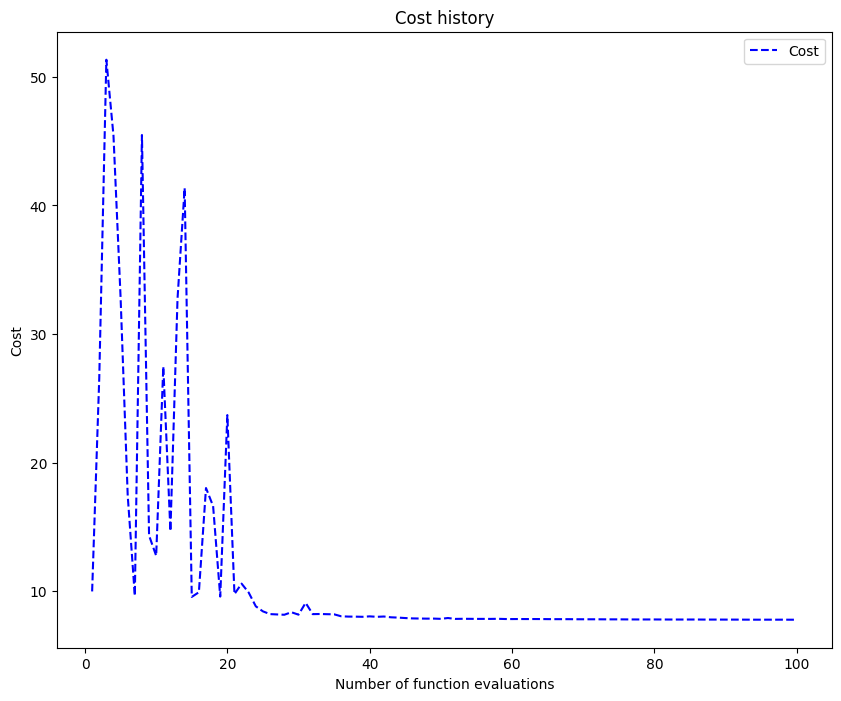

In [5]:

q.result.plot_cost()

In [6]:
print(q.result)

In [7]:
from openqaoa.backends import create_device, DeviceLocal

q_qiskit_sv = QAOA()
qiskit_dev = create_device(location='local',name='qiskit.statevector_simulator')
q_qiskit_sv.set_device(qiskit_dev)

In [8]:
q_qiskit_sv.compile(sp_qubo)
q_qiskit_sv.optimize()

In [9]:
qiskit_results = q_qiskit_sv.result

In [10]:
qiskit_results.most_probable_states

{'solutions_bitstrings': ['1111000000000'], 'bitstring_energy': 16.0}

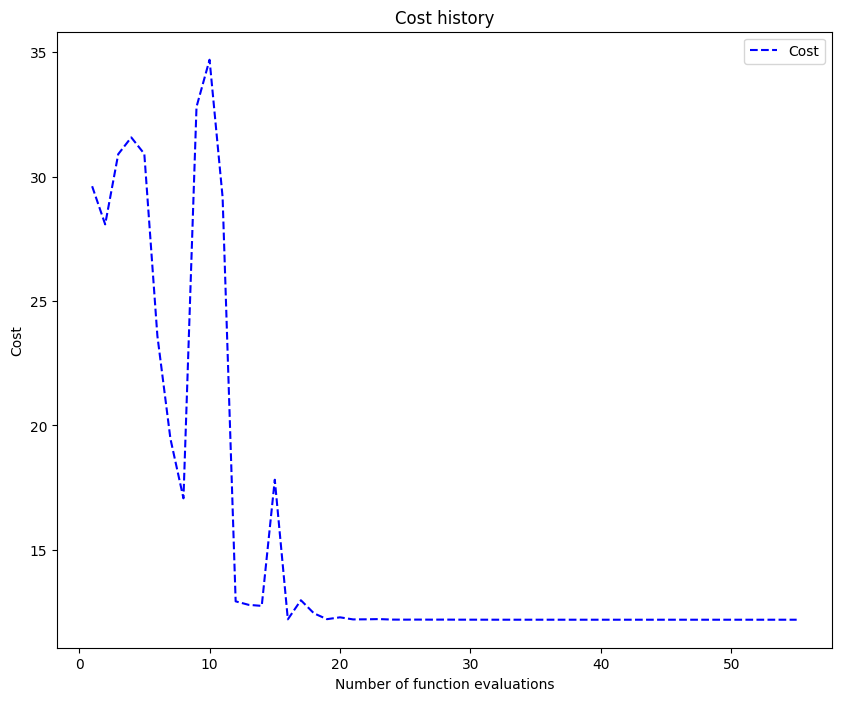

In [11]:
qiskit_results.plot_cost()

In [12]:
# xsi-I
# (x_01 + x_02 + x_03 - 1)^2

In [13]:
# x01

# qsqi.SparsePauliOp.from_list([("IIIIII", 1/2), ("ZIIIII", -1/2)])

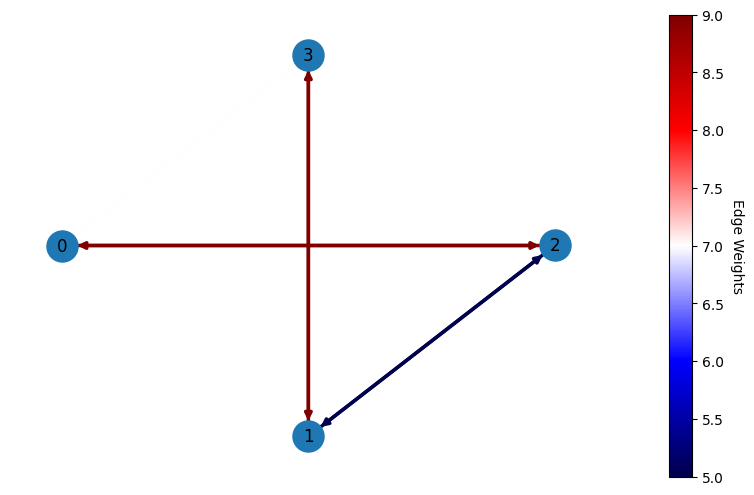

In [14]:
G = nx.generators.fast_gnp_random_graph(n=4, p=0.5, seed=42)

for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

G = nx.DiGraph(G)

plot_graph(G)



In [15]:
from qiskit.quantum_info import SparsePauliOp

def objective(G, S, E):
    terms = []

    total_qubits = len(G.edges())
    edges = list(G.edges())

    for (i, j) in edges:

        edge_weight = G.edges[i, j]['weight']
        
        operator = ['I'] * total_qubits
        terms.append((''.join(operator), 1/2 * edge_weight))
        operator[edges.index((i, j))] = 'Z'
        terms.append((''.join(operator), -1/2 * edge_weight))


    terms_pauli = SparsePauliOp.from_list(terms)
    return terms_pauli
    


    # for i in qubit_indices:
    #     for j in qubit_indices:
    #         if i < j:
    #             # ZZ term for i and j
    #             operator = ['I'] * total_qubits
    #             operator[i] = 'Z'
    #             operator[j] = 'Z'
    #             terms.append((''.join(operator), 1))
    #         if i == j:
    #             # Z term for i
    #             operator = ['I'] * total_qubits
    #             operator[i] = 'Z'
    #             terms.append((''.join(operator), -2))

    # identity = 'I' * total_qubits
    # terms.append((identity, 1))
    
    # hamiltonian = SparsePauliOp.from_list(terms)
    
    # return hamiltonian

# qubit_indices = [0, 1, 2]
# total_qubits = 3
# hamiltonian = generate_hamiltonian_terms(qubit_indices, total_qubits)
# print(hamiltonian)


In [16]:
def constraint_1(G, S, E):
    constraint_1_terms = []
    total_qubits = len(G.edges())
    edges = list(G.edges())
    
    for s, i in G.out_edges(S):
        operator = ['I'] * total_qubits
        constraint_1_terms.append((''.join(operator), 1/2))
        operator[edges.index((s, i))] = 'Z'
        constraint_1_terms.append((''.join(operator), -1/2))

    operator = ['I'] * total_qubits
    constraint_1_terms.append((''.join(operator), -1))

    constraint_1_pauli = SparsePauliOp.from_list(constraint_1_terms)
    constraint_1_pauli = constraint_1_pauli ** 2
    
    return constraint_1_pauli

In [17]:
def constraint_11(G, S, E):
    constraint_11_terms = []
    total_qubits = len(G.edges())
    edges = list(G.edges())

    for i, s in G.in_edges(S):
        operator = ['I'] * total_qubits
        constraint_11_terms.append((''.join(operator), 1/2))
        operator[edges.index((i, s))] = 'Z'
        constraint_11_terms.append((''.join(operator), -1/2))

    constraint_11_pauli = SparsePauliOp.from_list(constraint_11_terms)
    constraint_11_pauli = constraint_11_pauli ** 2

    return constraint_11_pauli

In [18]:
def constraint_2(G, S, E):
    constraint_2_terms = []
    total_qubits = len(G.edges())
    edges = list(G.edges())
    
    for i, e in G.in_edges(E):
        operator = ['I'] * total_qubits
        constraint_2_terms.append((''.join(operator), 1/2))
        operator[edges.index((i, e))] = 'Z'
        constraint_2_terms.append((''.join(operator), -1/2))

    operator = ['I'] * total_qubits
    constraint_2_terms.append((''.join(operator), -1))

    constraint_2_pauli = SparsePauliOp.from_list(constraint_2_terms)
    constraint_2_pauli = constraint_2_pauli ** 2
    
    return constraint_2_pauli

In [19]:
def constraint_22(G, S, E):
    constraint_22_terms = []
    total_qubits = len(G.edges())
    edges = list(G.edges())

    for e, i in G.in_edges(E):
        operator = ['I'] * total_qubits
        constraint_22_terms.append((''.join(operator), 1/2))
        operator[edges.index((e, i))] = 'Z'
        constraint_22_terms.append((''.join(operator), -1/2))

    constraint_22_pauli = SparsePauliOp.from_list(constraint_22_terms)
    constraint_22_pauli = constraint_22_pauli ** 2

    return constraint_22_pauli

In [20]:
def constraint_3(G, S, E):
    
    constraint_3_terms = []
    total_qubits = len(G.edges())
    edges = list(G.edges())

    for node in G:
        for i, j in G.out_edges(node):
            
            operator = ['I'] * total_qubits
            constraint_3_terms.append((''.join(operator), 1/2))
            operator[edges.index((i, j))] = 'Z'
            constraint_3_terms.append((''.join(operator), -1/2))
            
        for i, j in G.in_edges(node):
            operator = ['I'] * total_qubits
            constraint_3_terms.append((''.join(operator), -1/2))
            operator[edges.index((i, j))] = 'Z'
            constraint_3_terms.append((''.join(operator), 1/2))

    constraint_pauli = SparsePauliOp.from_list(constraint_3_terms)

    constraint_pauli = constraint_pauli ** 2
    
    return constraint_pauli
    



In [21]:
def hamiltonian(G, S, E):
    Hc = constraint_1(G, S, E) + constraint_11(G, S, E) + constraint_2(G, S, E) + constraint_22(G, S, E) + constraint_3(G, S, E)

    lamda = 100

    hamiltonian = objective(G, S, E) + lamda * Hc

    return hamiltonian

In [22]:
hamiltonian = hamiltonian(G, 0, 1)

In [23]:
print(hamiltonian)

SparsePauliOp(['IIIIIIII', 'ZIIIIIII', 'IIIIIIII', 'IZIIIIII', 'IIIIIIII', 'IIZIIIII', 'IIIIIIII', 'IIIZIIII', 'IIIIIIII', 'IIIIZIII', 'IIIIIIII', 'IIIIIZII', 'IIIIIIII', 'IIIIIIZI', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIIII', 'ZIIIIIII', 'IIIIIIII', 'IZIIIIII', 'IIIIIIII', 'ZIIIIIII', 'IIIIIIII', 'ZIIIIIII', 'ZZIIIIII', 'ZIIIIIII', 'IIIIIIII', 'ZIIIIIII', 'IIIIIIII', 'IZIIIIII', 'IIIIIIII', 'IZIIIIII', 'ZZIIIIII', 'IZIIIIII', 'IIIIIIII', 'IZIIIIII', 'IIIIIIII', 'ZIIIIIII', 'IIIIIIII', 'IZIIIIII', 'IIIIIIII', 'IIIIIIII', 'IIIIZIII', 'IIIIIIII', 'IIIIIIZI', 'IIIIZIII', 'IIIIIIII', 'IIIIZIII', 'IIIIZIZI', 'IIIIIIII', 'IIIIZIII', 'IIIIIIII', 'IIIIIIZI', 'IIIIIIZI', 'IIIIZIZI', 'IIIIIIZI', 'IIIIIIII', 'IIIIIIII', 'IIIIIZII', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIIII', 'IIIIIZII', 'IIIIIIII', 'IIIIIZII', 'IIIIIZIZ', 'IIIIIZII', 'IIIIIIII', 'IIIIIZII', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIZIZ', 'IIIIIIIZ', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIIII', 'IIIIIZII', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIIII', '

In [39]:
# General imports
import numpy as np
import warnings

warnings.filterwarnings("ignore")

from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

from qiskit_ibm_runtime import QiskitRuntimeService, Session
# from qiskit_ibm_runtime import EstimatorV2 as Estimator
# from qiskit_ibm_runtime import SamplerV2 as Sampler

# # SciPy minimizer routine
from scipy.optimize import minimize

# # rustworkx graph library
import rustworkx as rx
from rustworkx.visualization import mpl_draw

ModuleNotFoundError: No module named 'qiskit.primitives.containers'

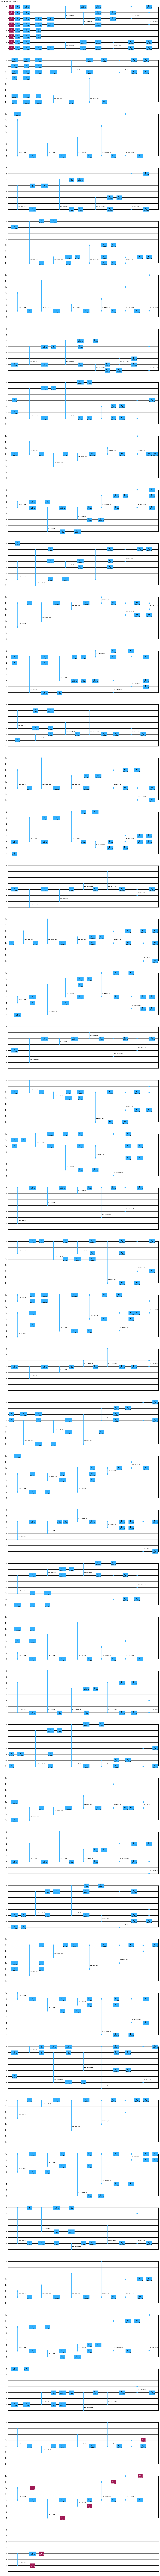

In [35]:
ham_tmp = SparsePauliOp.from_list([("IIIZZ", 1), ("IIZIZ", 1), ("IZIIZ", 1), ("ZIIIZ", 1)])


ansatz = QAOAAnsatz(hamiltonian, reps = 1)

ansatz.decompose(reps=3).draw(output="mpl", style="iqp")

In [36]:
ansatz.decompose().draw(output="mpl", style="iqp")

In [38]:
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

NameError: name 'QiskitRuntimeService' is not defined

In [37]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(ansatz)

NameError: name 'backend' is not defined